In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# segment class
class Segment:
    def __init__(self, left,right):
        self.left = left
        self.right = right
        
class Point:
    def __init__(self,x,y,side):
        self.x = x
        self.y = y
        self.side = side # 0 is left. 1 is right.
        self.segment = None

In [3]:
# Example segment creation:

left = Point(2,3,0)
right = Point(6,8,1)

s1 = Segment(left,right)
left.segment =s1
right.segment=s1

print(s1.left.x)

2


In [4]:
# Generate some segments:

def GenerateSegments(n=10, h =100, show = 1):
    # Returns an array of n segments and an array of 2n end-points from each segment
    segs = []
    points = []

    for i in range(n):
        v = np.zeros(4)
        #check for vertical points:
        while(v[0] == v[2]): #x1 == x2 means vertical point, so generate a new one.
            v = np.random.randint(low=1, high=h, size=4)
        
        left = Point(min(v[0],v[2]), v[1], 0)
        right = Point(max(v[0],v[2]), v[3], 1)

        s1 = Segment(left,right)
        left.segment =s1
        right.segment=s1
        #add segment to list of segments:
        segs.append(s1)
        # add segments left and right points to list of points:
        points.append(left)
        points.append(right)
    if(show>0):
        for s in segs:
            X = [s.left.x,s.right.x]
            Y =[s.left.y,s.right.y]

            plt.plot(X,Y)
        plt.savefig(str(n)+'_segments.pdf', format='pdf', bbox_inches='tight')
    return segs, points

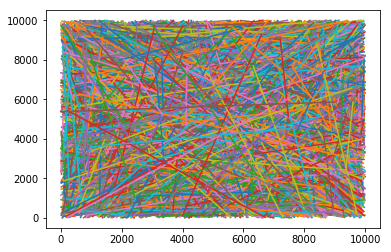

In [5]:
sg, pts = GenerateSegments(10000,10000)

KeyboardInterrupt: 

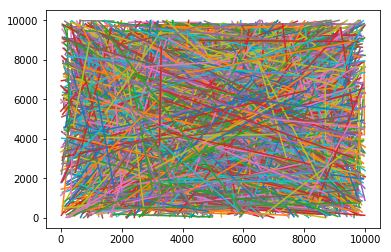

In [6]:
# plot the segments:

for s in sg:
    X = [s.left.x,s.right.x]
    Y =[s.left.y,s.right.y]
    
    plt.plot(X,Y)

In [7]:
# Merge Sort (Modified from Cormen):


def Merge(A,p,q,r):
    n1 = q-p+1
    n2 = r-q
    L = []                               # (MAX: n1+1 elements)
    R = []                               # (MAX: n2+1 elements)
    for i in range(n1): # i=1:n1
        L.append(A[p+i])
        
    for j in range(n2): # i=1:n2
        R.append(A[q+j+1])
    
    # Sentinel points:
    #n1+1
    L.append(Point(np.inf,np.inf,0)) 
    #n2+1
    R.append(Point(np.inf,np.inf,0)) 
    
    i = 0
    j = 0
    for k in range(p,r+1): # k=p:r
        if(L[i].x == R[j].x and L[i].side == R[j].side): 
            if(L[i].y < R[j].y):                 # case 3
                A[k] = L[i]                      # case 3
                i = i+1                          # case 3
            else:                                # case 3
                A[k] = R[j]                      # case 3
                j = j+1                          # case 3

        elif(L[i].x == R[j].x):
            if(L[i].side < R[j].side):           # case 2 sort by left side first
                A[k] = L[i]                      # case 2
                i = i+1                          # case 2
            else:                                # case 2
                A[k] = R[j]                      # case 2
                j = j+1                          # case 2
        
        elif(L[i].x < R[j].x):
            A[k] = L[i]                          # case 1
            i = i+1                              # case 1
        else:                                    # case 1
            A[k] = R[j]                          # case 1
            j = j+1                              # case 1

            
def MergeSort(A,p,r):
    if(p<r):
        q = int((p+r)/2)
        MergeSort(A,p,q)
        MergeSort(A,q+1,r)
        Merge(A,p,q,r)

In [8]:
MergeSort(pts,0,len(pts)-1)

In [9]:
print([p.x for p in pts])
print([p.y for p in pts])
print([p.side for p in pts])

[1, 1, 1, 1, 2, 2, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 8, 8, 8, 8, 10, 10, 10, 12, 12, 12, 13, 14, 15, 15, 15, 16, 16, 18, 18, 20, 21, 21, 21, 21, 21, 21, 22, 23, 23, 25, 26, 26, 26, 27, 28, 30, 30, 30, 30, 31, 32, 32, 34, 34, 35, 36, 36, 36, 36, 37, 37, 38, 38, 39, 41, 42, 43, 43, 44, 45, 45, 46, 46, 46, 46, 47, 47, 48, 48, 48, 48, 49, 49, 49, 49, 50, 50, 50, 50, 50, 51, 51, 51, 52, 52, 53, 53, 55, 55, 56, 58, 58, 58, 58, 59, 60, 60, 61, 61, 61, 62, 63, 64, 64, 65, 65, 65, 66, 66, 67, 67, 68, 68, 68, 69, 69, 69, 69, 70, 70, 70, 70, 72, 73, 73, 73, 74, 74, 75, 76, 76, 76, 76, 76, 77, 78, 78, 78, 79, 80, 82, 83, 83, 83, 84, 84, 85, 85, 85, 86, 89, 89, 89, 89, 90, 90, 90, 90, 91, 91, 91, 92, 92, 93, 93, 93, 94, 95, 95, 95, 96, 96, 96, 97, 97, 97, 97, 97, 98, 98, 99, 99, 99, 99, 102, 102, 102, 103, 103, 104, 104, 104, 104, 105, 105, 105, 105, 106, 106, 106, 106, 107, 107, 107, 108, 108, 108, 108, 108, 109, 110, 110, 110, 110, 111, 112, 112, 112, 112, 113, 114, 115, 115, 115, 116, 116, 117

In [10]:
pr = np.array([[p.x for p in pts], [p.side for p in pts],[p.y for p in pts] ] )

In [11]:
pr.T

array([[   1,    0, 3307],
       [   1,    0, 3334],
       [   1,    0, 3504],
       ...,
       [9998,    1, 6320],
       [9999,    1, 2082],
       [9999,    1, 3580]])

In [12]:
# Cross Product:
def Cross_Product(p1,p2):
    c = (p1.x*p2.y) - (p2.x*p1.y)
    return c


In [13]:
#  Modified Node Struct


# Each node of the tree now contains the attributes 
# color, 
# segment, 
# left, 
# right, 
# and p. 

# If a child or the parent of a node does not exist, the corresponding pointer attribute
# of the node contains the value NIL . We shall regard these NIL s as being pointers to
# leaves (external nodes) of the binary search tree and the normal, key-bearing nodes
# as being internal nodes of the tree. (Cormen)

class Node:
    def __init__(self, segment, colour="red", left=None, right=None, p=None):
        self.colour = colour
        self.segment = segment
        if(not segment):
            self.key = None
        else:
            self.key = Cross_Product(segment.left, segment.right)
        self.left = left
        self.right = right
        self.p = p
        


In [14]:
# Modified Tree struct (Cormen):

class RBTree:
    def __init__(self):
        self.nil = Node(None,"black") 
#         self.root =Node(root_key, "black",self.nil,self.nil,self.nil)
        # Must be able to initialiase an empty tree
        self.root = self.nil
#     -----------------------------------------------------------
#     -----------------------------------------------------------
    
    
    
    # Rotation Algorithms:
#     -----------------------------------------------------------
    # Left_rotate(Tree, node):
    def Left_Rotate(self, x):
#         print("left rotate:", x.key)
        y = x.right               # set y
        x.right = y.left          # turn  y's left subtree into x's right subtree.
        if(y.left != self.nil):
            y.left.p = x
        y.p = x.p                 # link x's parent to y
        if(x.p == self.nil):
            self.root = y
        elif(x == x.p.left):
            x.p.left = y
        else:
            x.p.right = y
        y.left = x               # put x on y's left
        x.p = y
        
#     -----------------------------------------------------------

        # Right Rotate(Tree, node) (symmetric to Left Rotate)
    def Right_Rotate(self,x):
#         print("right rotate:", x.key)
        y = x.left               # set y
        x.left = y.right          # turn  y's right subtree into x's left subtree.
        if(y.right != self.nil):
            y.right.p = x
        y.p = x.p                 # link x's parent to y
        if(x.p == self.nil):
            self.root = y
        elif(x == x.p.right):
            x.p.right = y
        else:
            x.p.left = y
        y.right = x               # put x on y's right
        x.p = y
    
    
#     -----------------------------------------------------------
#     -----------------------------------------------------------
    
    #Insertion Algorithms
    
    def RB_Insert_Fix(self, new_node):
        while new_node.p.colour == "red":
            if(new_node.p == new_node.p.p.left):
                y = new_node.p.p.right
                if(y.colour=="red"):
                    new_node.p.colour = "black"          # case 1
                    y.colour = "black"                   # case 1
                    new_node.p.p.colour = "red"          # case 1
                    new_node = new_node.p.p              # case 1
                elif(new_node == new_node.p.right):
                    new_node = new_node.p                # case 2
                    self.Left_Rotate(new_node)           # case 2
                else:
                    new_node.p.colour = "black"          # case 3
                    new_node.p.p.colour = "red"          # case 3
                    self.Right_Rotate(new_node.p.p)      # case 3
            else: # same then clause but with 'left' and 'right' exchanged
                y = new_node.p.p.left
                if(y.colour=="red"):
                    new_node.p.colour = "black"          # case 1
                    y.colour = "black"                   # case 1
                    new_node.p.p.colour = "red"          # case 1
                    new_node = new_node.p.p              # case 1
                elif(new_node == new_node.p.left):
                    new_node = new_node.p                # case 2
                    self.Right_Rotate(new_node)          # case 2
                else:
                    new_node.p.colour = "black"          # case 3
                    new_node.p.p.colour = "red"          # case 3
                    self.Left_Rotate(new_node.p.p)       # case 3

        self.root.colour = "black"

 #     -----------------------------------------------------------


    def insert(self, new_node):
        y = self.nil
        x = self.root
        
        while(x != self.nil ):
            y = x
            if(new_node.key < x.key):
                x = x.left
            else:
                x = x.right
        new_node.p = y
        if(y == self.nil):
            self.root = new_node
        elif(new_node.key < y.key):
            y.left = new_node
        else:
            y.right = new_node
        
        # set leaves:
        new_node.left = self.nil
        new_node.right = self.nil
        # assign default colour before fixup:
        new_node.colour = "red"
#         print("root before fix", self.root.key)
        self.RB_Insert_Fix(new_node)
        

        
#     -----------------------------------------------------------
#     -----------------------------------------------------------

    # Deletion Algorithms (Cormen)
    
    # RB Transplant
    def RB_Transplant(self, u, v):
        if(u.p == self.nil):
            self.root = v
        elif(u == u.p.left):
            u.p.left = v
        else:
            u.p.right = v
        v.p = u.p

#     -----------------------------------------------------------

        
#     RB_Delete_Fix
    def RB_Delete_Fix(self, x):
        while(x != self.root and x.colour == "black"):
            if(x == x.p.left):
                w = x.p.right
                if(w.colour == "red"):
                    w.colour = "black"       # case 1
                    x.p.colour = "red"       # case 1
                    self.Left_Rotate(x.p)    # case 1
                    w = x.p.right            # case 1
                if(w.left.colour == "black" and w.right.colour == "black"):
                    w.colour = "red"         # case 2
                    x=x.p                    # case 2
                elif(w.right.colour == "black"):
                    w.left.colour = "black"  # case 3
                    w.colour = "red"         # case 3
                    self.Right_Rotate(w)     # case 3
                    w = x.p.right            # case 3
                # indentation is weird here
                else:
                    w.colour = x.p.colour        # case 4
                    x.p.colour = "black"         # case 4
                    w.right.colour = "black"     # case 4
                    self.Left_Rotate(x.p)        # case 4
                    x = self.root                # case 4
                
            else: # same as then clause with 'left' and 'right' exchanged
                w = x.p.left
                if(w.colour == "red"):
                    w.colour = "black"         # case 1
                    x.p.colour = "red"         # case 1
                    self.Right_Rotate(x.p)     # case 1
                    w = x.p.left               # case 1
                if(w.right.colour == "black" and w.left.colour == "black"):
                    w.colour = "red"           # case 2
                    x = x.p                    # case 2
                elif(w.left.colour == "black"):
                    w.right.colour = "black"   # case 3
                    w.colour = "red"           # case 3
                    self.Left_Rotate(w)        # case 3
                    w = x.p.left               # case 3
                # indentation is weird here
                else:
                    w.colour = x.p.colour          # case 4
                    x.p.colour = "black"           # case 4
                    w.left.colour = "black"        # case 4
                    self.Right_Rotate(x.p)         # case 4
                    x = self.root                  # case 4
        #end while
        x.colour = "black"
        
#     -----------------------------------------------------------
                    
    # Tree Minimum(x)
    def Tree_Min(self,x):
        while(x.left != self.nil):
            x = x.left
        return x
                    
                        
    # Tree Max(x)
    def Tree_Max(self,x):
        while(x.right != self.nil):
            x = x.right
        return x     
    
#     -----------------------------------------------------------
    
    # RB Delete
    def RB_Delete(self, condemned):
        y = condemned
        y_old_colour = y.colour
        if(condemned.left == self.nil):
            x = condemned.right
            self.RB_Transplant(condemned, condemned.right)
        elif(condemned.right == self.nil):
            x = condemned.left
            self.RB_Transplant(condemned, condemned.left)
        else:
            y = self.Tree_Min(condemned.right)
            y_old_colour = y.colour
            x = y.right
            if(y.p == condemned):
                x.p = y
            else:
                self.RB_Transplant(y, y.right)
                y.right = condemned.right
                y.right.p = y
            self.RB_Transplant(condemned, y)
            y.left = condemned.left
            y.left.p = y
            y.colour = condemned.colour
        if(y_old_colour == "black"):
            self.RB_Delete_Fix(x)


        
#     -----------------------------------------------------------
#     -----------------------------------------------------------


    # In-Order Tree Walk(node):
    # (Cormen)

    def Inorder_Tree_Walk(self, node):
        if(node != self.nil):
            self.Inorder_Tree_Walk(node.left)
            if(node == self.root):
                print(node.key,node.colour,"root")
            else:
                print(node.key,node.colour,"->",node.p.key)
            self.Inorder_Tree_Walk(node.right)

#     -----------------------------------------------------------


    # Search for node containing query segment and key (cross prod)
    # (Cormen)
    def Tree_Search(self, key, x=None):
        if(not x):
            return self.Tree_Search(key, self.root)
        if(x == self.nil or key == x.key):
            return x
        if(key < x.key):
            return self.Tree_Search(key, x.left)
        else:
            return self.Tree_Search(key, x.right)
        
    #----------------------------------------------------------------
    # Tree Predecessor (Cormen)
    def Above(self, node):
        if(node.left != self.nil):
            return self.Tree_Max(node.left)
        y = node.p
        while(y != self.nil and node == y.left):
            node = y
            y = y.p
        return y


    #----------------------------------------------------------------

    # Tree Successor (Cormen)

    def Below(self, node):
        if(node.right != self.nil):
            return self.Tree_Min(node.right)
        y = node.p
        while(y != self.nil and node == y.right):
            node = y
            y = y.p
        return y

    #----------------------------------------------------------------


In [79]:
t = RBTree()

In [80]:
Cross_Product(sg[0].left, sg[0].right)

4296

In [91]:
print(P[0].segment.left.x)

2


In [92]:
def Direction(pi,pj,pk):
    p1x = pk.x-pi.x
    p1y = pk.y-pi.y
    p1 = Point(p1x,p1y,0)            #side is arbitrary in this case, so just use left to make constructor happy.
    
    p2x = pj.x-pi.x
    p2y = pj.y-pi.y
    p2 = Point(p2x,p2y,0)
    
    return Cross_Product(p1,p2)

In [93]:
Direction(P[0],P[1],P[2])

IndexError: list index out of range

In [15]:
# Any-Segments-Intersect (Cormen)


# Direction subroutine   
def Direction(pi,pj,pk):
    p1x = pk.x-pi.x
    p1y = pk.y-pi.y
    p1 = Point(p1x,p1y,0)            #side is arbitrary in this case, so just use left to make constructor happy.
    
    p2x = pj.x-pi.x
    p2y = pj.y-pi.y
    p2 = Point(p2x,p2y,0)
    
    return Cross_Product(p1,p2)    

#----------------------------------

def On_Segment(pi,pj,pk):
    if( (min(pi.x, pj.x) <= pk.x and pk.x <= max(pi.x, pj.x)) and 
       (min(pi.y,pj.y) <= pk.y and pk.y <= max(pi.y,pj.y)) ):
        return True
    else:
        return False



#----------------------------------

def Intersects(Seg1, Seg2):
    p1 = Seg1.left
    p2 = Seg1.right
    
    p3 = Seg2.left
    p4 = Seg2.right
    
    d1 = Direction(p3,p4,p1)
    d2 = Direction(p3,p4,p2)
    d3 = Direction(p1,p2,p3)
    d4 = Direction(p1,p2,p4)
    
    if( ( (d1>0 and d2<0) or (d1<0 and d2>0) ) and ( (d3>0 and d4<0) or (d3<0 and d4>0) ) ):
        return True
    elif(d1 == 0 and On_Segment(p3,p4,p1)):
        return True
    elif(d2 == 0 and On_Segment(p3,p4,p2)):
        return True
    elif(d3 == 0 and On_Segment(p1,p2,p3)):
        return True
    elif(d4 == 0 and On_Segment(p1,p2,p4)):
        return True
    else:
        return False
    
#----------------------------------
   
    
def Any_Segments_Intersect(S,P):
    T = RBTree()
    MergeSort(P,0,len(P)-1)                # sort the endpoints of the segments in S...
    for p in P:
        if(p.side == 0):                   # p is left endpoint of a segment
            s = Node(p.segment)
#             print("s",s)
#             print("s.key",s.key)
#             print("p.segment",p.segment)
#             print("s.segment",s.segment)
#             print("s.segment.left",s.segment.left)
#             print("s.segment.right",s.segment.right)

#             print("nil",T.nil)
            T.insert(s)
#             print("T.Above(s)",T.Above(s))
#             print("T.Above(s).segment",T.Above(s).segment)
            if( (T.Above(s) != T.nil and Intersects(T.Above(s).segment, s.segment)) or 
               (T.Below(s) != T.nil and Intersects(T.Below(s).segment, s.segment)) ):
                return True
        else:                            # p is right endpoint of a segment
            key = Cross_Product(p.segment.left, p.segment.right)
#             print("query key", key)
            s = T.Tree_Search(key)
#             print("s",s)
#             print("s.key",s.key)
#             print("p.segment",p.segment)
#             print("s.segment",s.segment)
            if( (T.Above(s) != T.nil and T.Below(s) != T.nil) and 
               (Intersects(T.Above(s).segment, T.Below(s).segment) ) ):
                return True
#             print("nil",T.nil)
            T.RB_Delete(s)
    return False

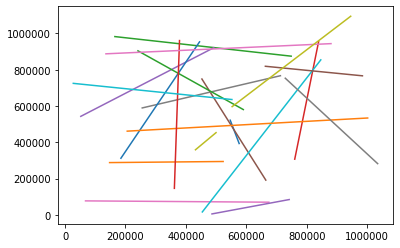

In [121]:
S, P = GenerateSegments(20, 1100000)

In [122]:
Any_Segments_Intersect(S,P)

root before fix -383127196629
root before fix -383127196629


True

In [258]:
ssss = np.arange(10,+9,1000)

In [259]:
ssss.size

101

In [260]:
ssss

array([    10,   1010,   2010,   3010,   4010,   5010,   6010,   7010,
         8010,   9010,  10010,  11010,  12010,  13010,  14010,  15010,
        16010,  17010,  18010,  19010,  20010,  21010,  22010,  23010,
        24010,  25010,  26010,  27010,  28010,  29010,  30010,  31010,
        32010,  33010,  34010,  35010,  36010,  37010,  38010,  39010,
        40010,  41010,  42010,  43010,  44010,  45010,  46010,  47010,
        48010,  49010,  50010,  51010,  52010,  53010,  54010,  55010,
        56010,  57010,  58010,  59010,  60010,  61010,  62010,  63010,
        64010,  65010,  66010,  67010,  68010,  69010,  70010,  71010,
        72010,  73010,  74010,  75010,  76010,  77010,  78010,  79010,
        80010,  81010,  82010,  83010,  84010,  85010,  86010,  87010,
        88010,  89010,  90010,  91010,  92010,  93010,  94010,  95010,
        96010,  97010,  98010,  99010, 100010])

#  Tests

In [45]:
from tqdm import tqdm
import time

In [46]:
input_sizes = np.arange(10,100101,1000)
print(len(input_sizes), input_sizes)

101 [    10   1010   2010   3010   4010   5010   6010   7010   8010   9010
  10010  11010  12010  13010  14010  15010  16010  17010  18010  19010
  20010  21010  22010  23010  24010  25010  26010  27010  28010  29010
  30010  31010  32010  33010  34010  35010  36010  37010  38010  39010
  40010  41010  42010  43010  44010  45010  46010  47010  48010  49010
  50010  51010  52010  53010  54010  55010  56010  57010  58010  59010
  60010  61010  62010  63010  64010  65010  66010  67010  68010  69010
  70010  71010  72010  73010  74010  75010  76010  77010  78010  79010
  80010  81010  82010  83010  84010  85010  86010  87010  88010  89010
  90010  91010  92010  93010  94010  95010  96010  97010  98010  99010
 100010]


In [227]:
# input_sizes = [10, 100, 1000 , 10000, 100000, 1000000]
input_sizes = np.arange(10,1110,10)
average_times = []
runs_per_size = 100

for i in input_sizes:
    print(i)
    S, P = GenerateSegments(i, 10000, 0)
    average = 0
    for a in tqdm(range(runs_per_size)):
        start = time.time()
        Any_Segments_Intersect(S,P)
        end = time.time()
        
        run_time = end - start
        average += run_time
    average_times.append(average/runs_per_size)

    
# save time
timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
np.savetxt(str(timestr),average_times)

  0%|          | 0/100 [00:00<?, ?it/s]

10
20


 44%|████▍     | 44/100 [00:00<00:00, 438.34it/s]

30


 30%|███       | 30/100 [00:00<00:00, 294.62it/s]

40


 23%|██▎       | 23/100 [00:00<00:00, 227.81it/s]

50


 17%|█▋        | 17/100 [00:00<00:00, 169.90it/s]

60


 16%|█▌        | 16/100 [00:00<00:00, 157.29it/s]

70


 11%|█         | 11/100 [00:00<00:00, 105.06it/s]

80


 13%|█▎        | 13/100 [00:00<00:00, 121.20it/s]

90


 11%|█         | 11/100 [00:00<00:00, 106.84it/s]

100


 10%|█         | 10/100 [00:00<00:00, 95.33it/s]

110


 10%|█         | 10/100 [00:00<00:00, 93.52it/s]

120


  8%|▊         | 8/100 [00:00<00:01, 77.16it/s]

130


  8%|▊         | 8/100 [00:00<00:01, 70.81it/s]

140


  6%|▌         | 6/100 [00:00<00:01, 59.32it/s]

150


  7%|▋         | 7/100 [00:00<00:01, 65.87it/s]

160


  7%|▋         | 7/100 [00:00<00:01, 63.78it/s]

170


  6%|▌         | 6/100 [00:00<00:01, 57.85it/s]

180


  6%|▌         | 6/100 [00:00<00:01, 52.29it/s]

190


  6%|▌         | 6/100 [00:00<00:01, 54.72it/s]

200


  6%|▌         | 6/100 [00:00<00:01, 51.90it/s]

210


  5%|▌         | 5/100 [00:00<00:02, 46.76it/s]

220


  5%|▌         | 5/100 [00:00<00:01, 47.55it/s]

230


  5%|▌         | 5/100 [00:00<00:02, 44.94it/s]

240


  4%|▍         | 4/100 [00:00<00:02, 35.15it/s]

250


  4%|▍         | 4/100 [00:00<00:02, 37.11it/s]

260


  4%|▍         | 4/100 [00:00<00:02, 33.55it/s]

270


  4%|▍         | 4/100 [00:00<00:02, 37.26it/s]

280


  4%|▍         | 4/100 [00:00<00:02, 33.83it/s]

290


  4%|▍         | 4/100 [00:00<00:02, 36.06it/s]

300


  4%|▍         | 4/100 [00:00<00:02, 34.15it/s]

310


  4%|▍         | 4/100 [00:00<00:02, 32.00it/s]

320


  4%|▍         | 4/100 [00:00<00:02, 33.16it/s]

330


  4%|▍         | 4/100 [00:00<00:03, 31.84it/s]

340


  3%|▎         | 3/100 [00:00<00:03, 29.28it/s]

350


  4%|▍         | 4/100 [00:00<00:03, 29.84it/s]

360


  3%|▎         | 3/100 [00:00<00:03, 27.61it/s]

370


  3%|▎         | 3/100 [00:00<00:03, 25.41it/s]

380


  3%|▎         | 3/100 [00:00<00:03, 27.06it/s]

390


  3%|▎         | 3/100 [00:00<00:03, 27.02it/s]

400


  3%|▎         | 3/100 [00:00<00:04, 24.08it/s]

410


  3%|▎         | 3/100 [00:00<00:03, 25.52it/s]

420


  3%|▎         | 3/100 [00:00<00:03, 25.14it/s]

430


  3%|▎         | 3/100 [00:00<00:04, 23.99it/s]

440


  3%|▎         | 3/100 [00:00<00:04, 23.84it/s]

450


  3%|▎         | 3/100 [00:00<00:04, 23.20it/s]

460


  3%|▎         | 3/100 [00:00<00:04, 20.32it/s]

470


  3%|▎         | 3/100 [00:00<00:04, 21.98it/s]

480


  3%|▎         | 3/100 [00:00<00:04, 20.77it/s]

490


  3%|▎         | 3/100 [00:00<00:04, 21.33it/s]

500


  3%|▎         | 3/100 [00:00<00:04, 20.44it/s]

510


  3%|▎         | 3/100 [00:00<00:04, 20.25it/s]

520


  2%|▏         | 2/100 [00:00<00:04, 19.75it/s]

530


  2%|▏         | 2/100 [00:00<00:07, 13.64it/s]

540


  3%|▎         | 3/100 [00:00<00:04, 19.88it/s]

550


  2%|▏         | 2/100 [00:00<00:05, 19.05it/s]

560


  2%|▏         | 2/100 [00:00<00:05, 18.68it/s]

570


  2%|▏         | 2/100 [00:00<00:05, 18.36it/s]

580


  2%|▏         | 2/100 [00:00<00:05, 17.91it/s]

590


  2%|▏         | 2/100 [00:00<00:05, 16.47it/s]

600


  2%|▏         | 2/100 [00:00<00:05, 17.33it/s]

610


  2%|▏         | 2/100 [00:00<00:05, 18.03it/s]

620


  2%|▏         | 2/100 [00:00<00:06, 15.19it/s]

630


  2%|▏         | 2/100 [00:00<00:05, 16.99it/s]

640


  2%|▏         | 2/100 [00:00<00:05, 17.44it/s]

650


  2%|▏         | 2/100 [00:00<00:05, 17.07it/s]

660


  2%|▏         | 2/100 [00:00<00:06, 15.38it/s]

670


  2%|▏         | 2/100 [00:00<00:06, 16.29it/s]

680


  2%|▏         | 2/100 [00:00<00:06, 15.36it/s]

690


  2%|▏         | 2/100 [00:00<00:06, 16.12it/s]

700


  2%|▏         | 2/100 [00:00<00:06, 15.55it/s]

710


  2%|▏         | 2/100 [00:00<00:07, 12.42it/s]

720


  2%|▏         | 2/100 [00:00<00:06, 14.62it/s]

730


  2%|▏         | 2/100 [00:00<00:06, 14.39it/s]

740


  2%|▏         | 2/100 [00:00<00:06, 14.27it/s]

750


  2%|▏         | 2/100 [00:00<00:06, 14.04it/s]

760


  2%|▏         | 2/100 [00:00<00:07, 13.63it/s]

770


  2%|▏         | 2/100 [00:00<00:06, 14.57it/s]

780


  2%|▏         | 2/100 [00:00<00:07, 13.74it/s]

790


  2%|▏         | 2/100 [00:00<00:07, 12.54it/s]

800


  2%|▏         | 2/100 [00:00<00:07, 13.64it/s]

810


  2%|▏         | 2/100 [00:00<00:07, 13.15it/s]

820


  2%|▏         | 2/100 [00:00<00:07, 13.62it/s]

830


  2%|▏         | 2/100 [00:00<00:07, 13.29it/s]

840


  2%|▏         | 2/100 [00:00<00:07, 13.45it/s]

850


  2%|▏         | 2/100 [00:00<00:08, 11.59it/s]

860


  2%|▏         | 2/100 [00:00<00:08, 12.21it/s]

870


  2%|▏         | 2/100 [00:00<00:07, 12.52it/s]

880


  2%|▏         | 2/100 [00:00<00:07, 12.37it/s]

890


  2%|▏         | 2/100 [00:00<00:07, 12.27it/s]

900


  0%|          | 0/100 [00:00<?, ?it/s]

910


  2%|▏         | 2/100 [00:00<00:08, 12.15it/s]

920


  2%|▏         | 2/100 [00:00<00:08, 11.93it/s]

930


  0%|          | 0/100 [00:00<?, ?it/s]

940


  2%|▏         | 2/100 [00:00<00:08, 11.65it/s]

950


  2%|▏         | 2/100 [00:00<00:08, 11.69it/s]

960


  2%|▏         | 2/100 [00:00<00:08, 11.18it/s]

970


  2%|▏         | 2/100 [00:00<00:08, 11.02it/s]

980


  2%|▏         | 2/100 [00:00<00:08, 10.96it/s]

990


  2%|▏         | 2/100 [00:00<00:08, 11.05it/s]

1000


  2%|▏         | 2/100 [00:00<00:09, 10.76it/s]

1010


  2%|▏         | 2/100 [00:00<00:09, 10.31it/s]

1020


  0%|          | 0/100 [00:00<?, ?it/s]

1030


  0%|          | 0/100 [00:00<?, ?it/s]

1040


  2%|▏         | 2/100 [00:00<00:09, 10.23it/s]

1050


  2%|▏         | 2/100 [00:00<00:09, 10.31it/s]

1060


  0%|          | 0/100 [00:00<?, ?it/s]

1070


  0%|          | 0/100 [00:00<?, ?it/s]

1080


  0%|          | 0/100 [00:00<?, ?it/s]

1090


  0%|          | 0/100 [00:00<?, ?it/s]

1100


100%|██████████| 100/100 [00:13<00:00,  7.41it/s]


In [228]:
average_times

[0.0012531757354736328,
 0.00171891450881958,
 0.002543494701385498,
 0.00312868595123291,
 0.0043499374389648435,
 0.005488994121551513,
 0.006328463554382324,
 0.009049508571624756,
 0.008213295936584472,
 0.009431650638580322,
 0.010937378406524659,
 0.012000093460083008,
 0.01318269968032837,
 0.015580947399139405,
 0.016348204612731933,
 0.015371580123901368,
 0.017208330631256104,
 0.018071081638336182,
 0.01922409772872925,
 0.02039649724960327,
 0.020933825969696045,
 0.022260279655456544,
 0.023379025459289552,
 0.026877985000610352,
 0.02684589147567749,
 0.02767498016357422,
 0.028066420555114747,
 0.029286491870880126,
 0.029850211143493652,
 0.030925915241241456,
 0.03226492404937744,
 0.03389386415481568,
 0.03458097219467163,
 0.03550472021102905,
 0.03718958854675293,
 0.03790186405181885,
 0.04060135364532471,
 0.04253947734832764,
 0.04103577136993408,
 0.04278377294540405,
 0.044207966327667235,
 0.04473577260971069,
 0.046468298435211185,
 0.04786732912063599,
 0.04

# Graphs

In [16]:
import seaborn as sns

In [344]:
average_times2 = [1.509928703308105339e-04,3.220577239990234358e-03,6.555101871490478550e-03,1.006002426147461007e-02,1.351681470870971617e-02,1.694425344467163225e-02,2.074619770050048842e-02,2.449323654174804729e-02,2.818568944931030412e-02,3.189668178558349720e-02,3.525436162948608620e-02,3.913580417633056446e-02,4.307438373565673773e-02,4.935942173004150696e-02,5.581981897354126171e-02,5.672142744064331138e-02,5.870050430297851785e-02,6.244913101196289396e-02,6.652018070220946933e-02,7.018251895904541182e-02,7.396918058395385298e-02,8.239942073822020818e-02,8.573492288589477928e-02,8.593627691268920787e-02,9.047072410583495428e-02,9.532889842987060658e-02,1.030862522125244179e-01,1.073283648490905712e-01,1.077476477622985873e-01,1.119473958015441833e-01,1.170360159873962413e-01,1.277843213081359952e-01,1.225116395950317377e-01,1.271370625495910622e-01,1.309670662879943714e-01,1.516479563713073742e-01,1.380989408493041859e-01,1.428833103179931729e-01,1.552526164054870705e-01,1.508802366256713767e-01,1.543255043029785056e-01,1.680516290664672840e-01,1.617185902595520142e-01,1.681219267845153742e-01,1.807283067703246981e-01,1.759070134162902810e-01,1.880897974967956632e-01,1.847649264335632369e-01,1.881167459487914917e-01,2.025702309608459484e-01,1.966570949554443393e-01,2.115696835517883179e-01,2.057907605171203635e-01,2.184308552742004472e-01,2.178654718399047896e-01,2.201078701019286987e-01,2.313978385925292980e-01,2.296295666694641024e-01,2.432766032218933172e-01,2.383840203285217396e-01,2.523815536499023349e-01,3.206248378753662198e-01,2.494301819801330589e-01,2.642110943794250266e-01,2.579470658302306929e-01,2.728601336479187234e-01,2.653626012802123846e-01,2.806107258796691761e-01,2.809511184692382590e-01,2.839856410026550537e-01,2.935632729530334717e-01,2.861633753776550160e-01,3.023512697219848389e-01,3.060658049583435125e-01,2.995585846900939986e-01,3.138971495628357089e-01,3.147360372543335227e-01,3.148296833038329856e-01,3.263409757614135764e-01,3.316165971755981601e-01,3.247359776496887007e-01,3.398806405067443803e-01,3.440301632881164751e-01,3.418747997283935747e-01,3.509984922409057351e-01,3.576367163658142334e-01,3.629584908485412598e-01,3.595998072624206343e-01,3.655814838409423562e-01,3.754261636734008700e-01,3.806147909164428467e-01,3.867345595359802379e-01,3.843414616584777677e-01,3.918217778205871360e-01,4.066111660003662309e-01,4.116884756088257102e-01,4.111968779563903720e-01,4.187378072738647261e-01,4.181503033638000466e-01,4.225308227539062433e-01,4.273869562149048007e-01]

In [17]:
average_times3 = [1.822376251220703158e-04,3.642573356628418108e-02,8.491777420043945812e-02,1.240374875068664534e-01,1.800834560394287132e-01,2.162354731559753551e-01,2.685160136222839444e-01,3.167902302742004461e-01,3.795193409919738747e-01,4.423103785514831410e-01,4.800999808311462447e-01,5.321161150932312012e-01,5.918608140945434970e-01,6.431656241416930930e-01,6.950374984741211071e-01,7.730648732185363414e-01,8.079555511474609819e-01,8.501544785499572932e-01,9.113269829750061390e-01,9.578352284431457253e-01,1.015520377159118581e+00,1.111714172363281294e+00,1.132348229885101309e+00,1.197144680023193297e+00,1.256661460399627783e+00,1.312818970680236896e+00,1.361367433071136501e+00,1.472716917991638175e+00,1.483281083106994691e+00,1.544042522907257187e+00,1.630995121002197346e+00,1.658191308975219824e+00,1.745067391395568768e+00,1.800568048954009903e+00,1.831850988864898611e+00,1.898105113506317165e+00,1.949008359909057519e+00,2.012541050910949814e+00,2.092366325855254949e+00,2.151736147403716881e+00,2.196644887924194212e+00,2.327696423530578596e+00,2.312060394287109411e+00,2.375075492858886861e+00,2.431388998031616122e+00,2.498057520389556974e+00,2.551450409889221227e+00,2.646052472591400306e+00,2.706595993041992276e+00,2.770669114589691340e+00,2.796902713775634819e+00,2.854978334903717219e+00,2.921396739482879479e+00,3.070877792835235542e+00,3.051834058761596857e+00,3.137615997791290301e+00,3.332867925167083634e+00,3.253822042942047243e+00,3.356670579910278285e+00,3.370546848773956494e+00,3.447676286697387571e+00,3.540646951198577863e+00,3.674525206089019669e+00,3.676106705665588503e+00,3.727687551975250368e+00,3.902353155612945379e+00,3.860941603183746462e+00,3.913575136661529452e+00,3.971855270862579168e+00,4.076418621540069509e+00,4.211614763736724498e+00,4.185788075923920104e+00,4.224719858169555309e+00,4.384024009704590163e+00,4.349359350204467844e+00,4.395246822834014466e+00,4.701082851886749125e+00,4.530430159568786586e+00,4.686490871906280553e+00,4.940768353939056112e+00,4.874129095077514684e+00,4.905349600315093817e+00,5.157466430664062074e+00,4.954803421497344651e+00,5.129923195838927974e+00,5.369218540191650568e+00,5.238167436122894038e+00,5.125881111621856334e+00,5.508135330677032648e+00,5.288502519130706681e+00,5.358107554912566961e+00,5.461413195133209442e+00,5.507424986362456920e+00,5.549647080898284734e+00,5.627104773521423020e+00,5.725319347381591761e+00,5.896922745704650914e+00,5.883225228786468364e+00,6.016389353275299001e+00,6.014336719512939133e+00,6.040917115211486887e+00]

In [18]:
m = max(average_times3)
print(m+(0.01*m))

6.1013262863636015


In [19]:
len(average_times3)

101

In [105]:
#Theoretical  n log n
# thlg = np.linspace(1,41.1, len(input_sizes))
thlg = np.linspace(1,3.414, 101) # big run
# thlg = np.linspace(1,20000, 201) # big brain

# thlg = np.linspace(1,1.2641, 101) # labs

# print(thlg)
# print()
tnln = thlg*np.log2(thlg)
print(tnln)
print()
print(average_times3)

[0.         0.03524367 0.07130832 0.10817504 0.14582576 0.18424323
 0.22341093 0.26331303 0.30393438 0.3452604  0.38727714 0.42997115
 0.47332951 0.51733979 0.56199001 0.60726862 0.65316448 0.69966684
 0.74676533 0.7944499  0.84271086 0.89153882 0.9409247  0.99085971
 1.04133531 1.09234325 1.14387551 1.19592431 1.24848211 1.30154156
 1.35509556 1.40913717 1.46365966 1.51865647 1.57412125 1.63004778
 1.68643002 1.74326208 1.80053823 1.85825288 1.91640057 1.97497598
 2.03397393 2.09338935 2.1532173  2.21345294 2.27409157 2.33512856
 2.39655941 2.45837973 2.52058519 2.5831716  2.64613482 2.70947082
 2.77317566 2.83724548 2.90167647 2.96646495 3.03160727 3.09709987
 3.16293928 3.22912206 3.29564487 3.36250442 3.42969748 3.49722089
 3.56507155 3.63324641 3.70174248 3.77055682 3.83968656 3.90912885
 3.97888093 4.04894005 4.11930354 4.18996876 4.26093312 4.33219407
 4.4037491  4.47559576 4.54773162 4.62015429 4.69286145 4.76585077
 4.83912    4.9126669  4.98648928 5.06058497 5.13495184 5.2095

In [95]:
#Theoretical  n ^2
tn = np.linspace(0,20000, 201) # big run
# thlg = np.linspace(1,1.2641, 101) # labs

# print(thlg)
# print()
tn2 = tn*tn
print(tn2[:101])
print()
print(average_times3)

[0.000e+00 1.000e+04 4.000e+04 9.000e+04 1.600e+05 2.500e+05 3.600e+05
 4.900e+05 6.400e+05 8.100e+05 1.000e+06 1.210e+06 1.440e+06 1.690e+06
 1.960e+06 2.250e+06 2.560e+06 2.890e+06 3.240e+06 3.610e+06 4.000e+06
 4.410e+06 4.840e+06 5.290e+06 5.760e+06 6.250e+06 6.760e+06 7.290e+06
 7.840e+06 8.410e+06 9.000e+06 9.610e+06 1.024e+07 1.089e+07 1.156e+07
 1.225e+07 1.296e+07 1.369e+07 1.444e+07 1.521e+07 1.600e+07 1.681e+07
 1.764e+07 1.849e+07 1.936e+07 2.025e+07 2.116e+07 2.209e+07 2.304e+07
 2.401e+07 2.500e+07 2.601e+07 2.704e+07 2.809e+07 2.916e+07 3.025e+07
 3.136e+07 3.249e+07 3.364e+07 3.481e+07 3.600e+07 3.721e+07 3.844e+07
 3.969e+07 4.096e+07 4.225e+07 4.356e+07 4.489e+07 4.624e+07 4.761e+07
 4.900e+07 5.041e+07 5.184e+07 5.329e+07 5.476e+07 5.625e+07 5.776e+07
 5.929e+07 6.084e+07 6.241e+07 6.400e+07 6.561e+07 6.724e+07 6.889e+07
 7.056e+07 7.225e+07 7.396e+07 7.569e+07 7.744e+07 7.921e+07 8.100e+07
 8.281e+07 8.464e+07 8.649e+07 8.836e+07 9.025e+07 9.216e+07 9.409e+07
 9.604

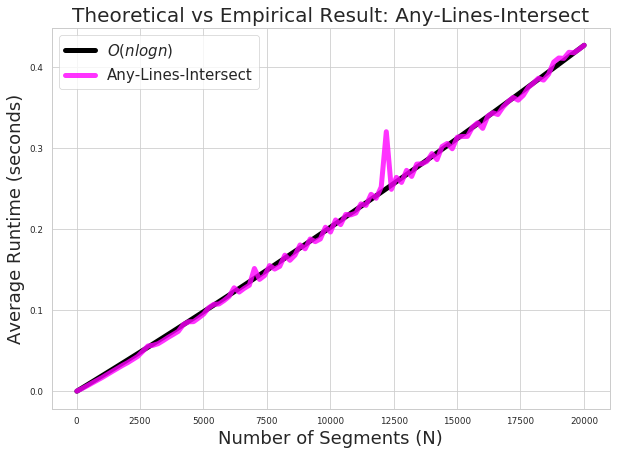

In [72]:
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 7))

input_sizes = np.arange(10,20101,200)

plt.plot(input_sizes,tnln, linewidth=5, marker='',markerfacecolor='blue', markersize=6, color='black', label = r'$O(n log n)$')
plt.plot(input_sizes,labs2, linewidth=5, marker='',markerfacecolor='blue', markersize=6,alpha=0.8, color='fuchsia', label = 'Any-Lines-Intersect')

plt.ylabel('Average Runtime (seconds)',fontsize=18)
plt.xlabel('Number of Segments (N)',fontsize=18)
plt.title('Theoretical vs Empirical Result: Any-Lines-Intersect', fontsize=20)
plt.legend(fontsize=15)

timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
# plt.savefig(str(timestr)+' 101sizes_20000.pdf', format='pdf', bbox_inches='tight') 

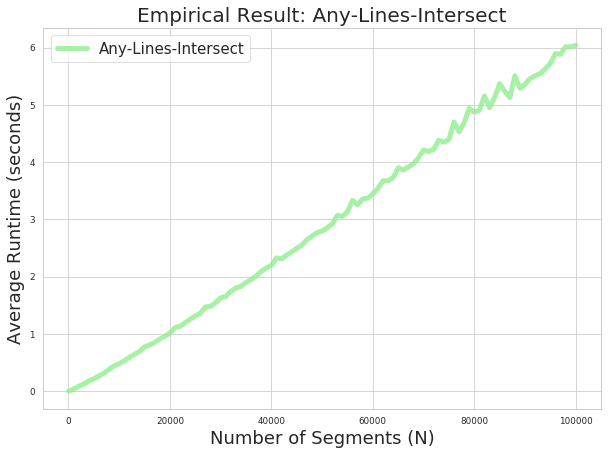

In [110]:
# Big Run
input_sizes = np.arange(10,100101,1000)

sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 7))

# plt.plot(input_sizes,tnln, linewidth=5, marker='',markerfacecolor='blue', markersize=6, color='black', label = r'$O(n log n)$')
plt.plot(input_sizes,average_times3, linewidth=5, marker='',markerfacecolor='blue', markersize=6,alpha=0.8, color='lightgreen', label = 'Any-Lines-Intersect')
# plt.plot(input_sizes,tn2[:101], linewidth=5, marker='',markerfacecolor='blue', markersize=6,alpha=0.8, color='red', label = r'$O(n^2)$')

plt.ylabel('Average Runtime (seconds)',fontsize=18)
plt.xlabel('Number of Segments (N)',fontsize=18)
plt.title('Empirical Result: Any-Lines-Intersect', fontsize=20)
plt.legend(fontsize=15)

timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
plt.savefig(str(timestr)+' Standalone101sizes_BigRun.pdf', format='pdf', bbox_inches='tight') 

In [37]:
labs =[1.777172088623046821e-04,2.576160430908203298e-03,3.637506961822509904e-02,4.726468801498412975e-01,5.674165606498718262e+00,6.948684961795807169e+01]

In [ ]:
print(labs)

In [ ]:
# input_sizes = [10, 100, 1000 , 10000, 100000, 1000000]
input_sizes = np.arange(10,20101,200)
average_times = []
runs_per_size = 100

for i in input_sizes:
    print(i)
    average = 0
    for a in tqdm(range(runs_per_size)):
        S, P = GenerateSegments(i, 10000, 0)

        
        start = time.time()
        Any_Segments_Intersect(S,P)
        end = time.time()
        
        run_time = end - start
        average += run_time
    average_times.append(average/runs_per_size)

    
# save time
timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
np.savetxt(str(timestr),average_times)

In [271]:
 S, P = GenerateSegments(20000, 10000, 0)

In [56]:
input_sizes = np.arange(10,20101,200)
print(len(input_sizes),input_sizes)

101 [   10   210   410   610   810  1010  1210  1410  1610  1810  2010  2210
  2410  2610  2810  3010  3210  3410  3610  3810  4010  4210  4410  4610
  4810  5010  5210  5410  5610  5810  6010  6210  6410  6610  6810  7010
  7210  7410  7610  7810  8010  8210  8410  8610  8810  9010  9210  9410
  9610  9810 10010 10210 10410 10610 10810 11010 11210 11410 11610 11810
 12010 12210 12410 12610 12810 13010 13210 13410 13610 13810 14010 14210
 14410 14610 14810 15010 15210 15410 15610 15810 16010 16210 16410 16610
 16810 17010 17210 17410 17610 17810 18010 18210 18410 18610 18810 19010
 19210 19410 19610 19810 20010]


In [55]:
labs2 =[1.509928703308105339e-04,3.220577239990234358e-03,6.555101871490478550e-03,1.006002426147461007e-02,1.351681470870971617e-02,1.694425344467163225e-02,2.074619770050048842e-02,2.449323654174804729e-02,2.818568944931030412e-02,3.189668178558349720e-02,3.525436162948608620e-02,3.913580417633056446e-02,4.307438373565673773e-02,4.935942173004150696e-02,5.581981897354126171e-02,5.672142744064331138e-02,5.870050430297851785e-02,6.244913101196289396e-02,6.652018070220946933e-02,7.018251895904541182e-02,7.396918058395385298e-02,8.239942073822020818e-02,8.573492288589477928e-02,8.593627691268920787e-02,9.047072410583495428e-02,9.532889842987060658e-02,1.030862522125244179e-01,1.073283648490905712e-01,1.077476477622985873e-01,1.119473958015441833e-01,1.170360159873962413e-01,1.277843213081359952e-01,1.225116395950317377e-01,1.271370625495910622e-01,1.309670662879943714e-01,1.516479563713073742e-01,1.380989408493041859e-01,1.428833103179931729e-01,1.552526164054870705e-01,1.508802366256713767e-01,1.543255043029785056e-01,1.680516290664672840e-01,1.617185902595520142e-01,1.681219267845153742e-01,1.807283067703246981e-01,1.759070134162902810e-01,1.880897974967956632e-01,1.847649264335632369e-01,1.881167459487914917e-01,2.025702309608459484e-01,1.966570949554443393e-01,2.115696835517883179e-01,2.057907605171203635e-01,2.184308552742004472e-01,2.178654718399047896e-01,2.201078701019286987e-01,2.313978385925292980e-01,2.296295666694641024e-01,2.432766032218933172e-01,2.383840203285217396e-01,2.523815536499023349e-01,3.206248378753662198e-01,2.494301819801330589e-01,2.642110943794250266e-01,2.579470658302306929e-01,2.728601336479187234e-01,2.653626012802123846e-01,2.806107258796691761e-01,2.809511184692382590e-01,2.839856410026550537e-01,2.935632729530334717e-01,2.861633753776550160e-01,3.023512697219848389e-01,3.060658049583435125e-01,2.995585846900939986e-01,3.138971495628357089e-01,3.147360372543335227e-01,3.148296833038329856e-01,3.263409757614135764e-01,3.316165971755981601e-01,3.247359776496887007e-01,3.398806405067443803e-01,3.440301632881164751e-01,3.418747997283935747e-01,3.509984922409057351e-01,3.576367163658142334e-01,3.629584908485412598e-01,3.595998072624206343e-01,3.655814838409423562e-01,3.754261636734008700e-01,3.806147909164428467e-01,3.867345595359802379e-01,3.843414616584777677e-01,3.918217778205871360e-01,4.066111660003662309e-01,4.116884756088257102e-01,4.111968779563903720e-01,4.187378072738647261e-01,4.181503033638000466e-01,4.225308227539062433e-01,4.273869562149048007e-01]

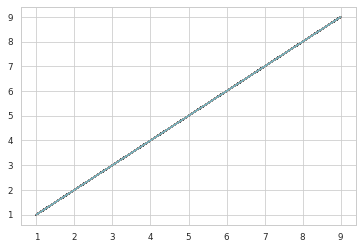

In [283]:

for s in sg:
    X = np.arange(1,10,1)
    Y = np.arange(1,10,1)
    
    plt.plot(X,Y)

In [112]:
def Nigenerate_segments(num_segments):

    slist = []
    plist = []
    for i in range(num_segments):
        v = np.zeros(4)
        while v[0] == v[1]:
            v = np.random.randint(0,10000,2)
            c = np.random.randint(0+i*10,10+10*i,2)

        p1 = Point(min(v[0],v[1]),c[0], 0)
        p2 = Point(max(v[0],v[1]),c[1], 1)
        s = Segment(p1,p2)
        p1.segment = s
        p2.segment = s
        slist.append(s)
        plist.append(p1)
        plist.append(p2)
        
    return slist,plist

sns.set_context("talk")


False

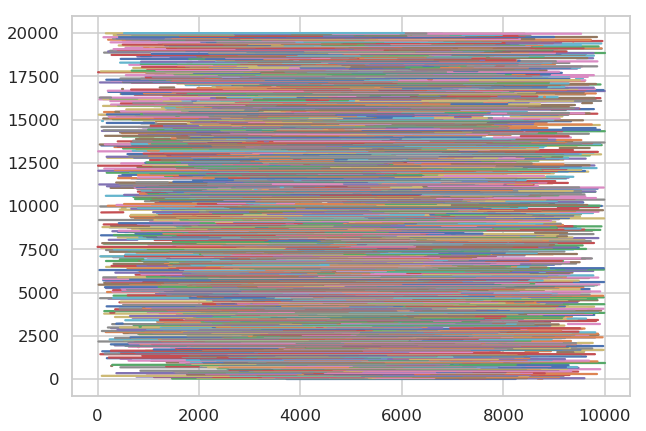

In [115]:
nnn = 2000
teepa, tup= Nigenerate_segments(nnn)
plt.figure(figsize=(10, 7))

for s in teepa:
    X = [s.left.x,s.right.x]
    Y =[s.left.y,s.right.y]

    
    plt.plot(X,Y)

plt.savefig(str(nnn)+' no_intersect.pdf', format='pdf', bbox_inches='tight')     
Any_Segments_Intersect(teepa,tup)

In [118]:
# Generate segments with no intersections:

def GenerateSegments2(n=10, h =100, show = 1):
    # Returns an array of n segments and an array of 2n end-points from each segment
    segs = []
    points = []

    for i in range(n):
        v = np.zeros(4)
        #check for vertical points:
        while(v[0] == v[1]): #x1 == x2 means vertical point, so generate a new one.
            v = np.random.randint(0,10000,2)
            c = np.random.randint(0+i*10,10+10*i,2)
        
        left = Point(min(v[0],v[1]),c[0], 0)
        right = Point(max(v[0],v[1]),c[1], 1)

        s1 = Segment(left,right)
        left.segment =s1
        right.segment=s1
        #add segment to list of segments:
        segs.append(s1)
        # add segments left and right points to list of points:
        points.append(left)
        points.append(right)
    if(show>0):
        for s in segs:
            X = [s.left.x,s.right.x]
            Y =[s.left.y,s.right.y]

            plt.plot(X,Y)
        plt.savefig(str(n)+'_segments.pdf', format='pdf', bbox_inches='tight')
    return segs, points

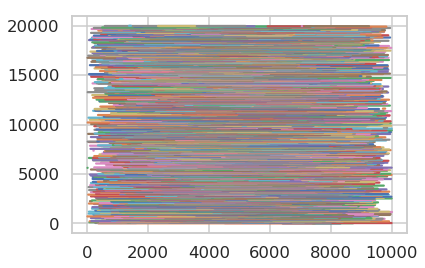

In [119]:
nnn = 2000
teepa, tup= GenerateSegments2(nnn)

In [120]:
no_intersect = [2.836418151855468902e-04,8.249468803405761441e-03,1.682087182998657365e-02,2.526197671890258872e-02,3.406785488128662165e-02,4.299970149993896651e-02,5.350965976715087863e-02,6.305530786514282338e-02,7.138140439987182562e-02,8.282783746719360463e-02,9.402237653732299638e-02,1.001671123504638689e-01,1.094331121444702126e-01,1.177994966506958063e-01,1.311394834518432584e-01,1.407817792892455955e-01,1.470544624328613270e-01,1.541458535194396851e-01,1.626938343048095759e-01,1.842982482910156261e-01,1.828274726867675781e-01,2.030763888359069791e-01,2.055302047729492265e-01,2.178041601181030240e-01,2.264306855201721203e-01,2.328570270538330156e-01,2.529515457153320157e-01,2.485795521736144931e-01,2.713368964195251309e-01,2.677219867706298606e-01,2.900502800941467396e-01,2.887401866912842063e-01,3.080310988426208652e-01,3.229158687591552890e-01,3.205659341812133745e-01,3.393172407150268355e-01,3.429532313346863037e-01,3.493220019340514959e-01,3.683107376098632701e-01,3.759285187721252419e-01,3.783899831771850852e-01,3.973160099983215066e-01,4.082034134864807040e-01,4.089682388305664329e-01,4.245100927352905007e-01,4.393658661842346214e-01,4.493045043945312345e-01,4.584826540946960183e-01,4.685054588317871249e-01,4.791447257995605225e-01,4.910222935676574751e-01,4.948730468750000000e-01,5.028495788574218750e-01,5.198336291313171431e-01,5.359189391136169878e-01,5.391189002990722789e-01,5.561036562919616788e-01,5.691153478622436035e-01,5.728959059715270641e-01,5.831073951721191806e-01,5.922150158882141247e-01,6.008595132827758700e-01,6.112593650817871316e-01,6.264913463592529652e-01,6.445925641059875311e-01,6.433501482009887917e-01,6.536974620819091530e-01,6.674374103546142356e-01,6.902078270912170854e-01,6.837385654449462669e-01,6.917977619171142845e-01,7.095764446258544522e-01,7.293156814575195712e-01,7.273655223846435813e-01,7.553995847702026367e-01,7.544320940971374068e-01,7.786150455474853960e-01,7.693442225456237349e-01,7.834972524642944691e-01,7.970077276229858843e-01,8.109330129623413264e-01,8.155173587799072754e-01,8.183540654182434038e-01,8.442106485366821511e-01,8.566788649559020641e-01,8.574993824958800914e-01,8.773777747154235529e-01,8.913408255577087713e-01,9.012441086769104048e-01,9.090213561058044789e-01,9.247444319725036666e-01,9.365365886688232777e-01,9.379407262802124112e-01,9.574049401283264427e-01,9.715625023841858443e-01,9.820716977119445801e-01,9.907668924331665128e-01,1.009179208278655926e+00,1.017119703292846733e+00,1.024542846679687536e+00,1.021906774044036847e+00]

In [133]:
#Theoretical  n log n
# thlg = np.linspace(1,41.1, len(input_sizes))
thlg2 = np.linspace(1,1.231, 101) # big run
# thlg = np.linspace(1,20000, 201) # big brain

# thlg = np.linspace(1,1.2641, 101) # labs

# print(thlg)
# print()
tnlnNO = thlg*np.log2(thlg2)
print(tnlnNO)
print()
print(no_intersect)

[0.         0.00340914 0.00697096 0.01068494 0.01455057 0.01856735
 0.02273475 0.02705228 0.03151943 0.0361357  0.04090061 0.04581365
 0.05087434 0.05608219 0.06143671 0.06693743 0.07258387 0.07837554
 0.08431198 0.09039272 0.09661728 0.10298522 0.10949605 0.11614933
 0.12294459 0.12988139 0.13695927 0.14417779 0.15153648 0.15903493
 0.16667267 0.17444928 0.18236431 0.19041734 0.19860792 0.20693564
 0.21540007 0.22400078 0.23273735 0.24160936 0.2506164  0.25975804
 0.26903388 0.27844351 0.28798652 0.2976625  0.30747105 0.31741177
 0.32748426 0.33768812 0.34802296 0.35848839 0.36908401 0.37980944
 0.39066429 0.40164817 0.41276071 0.42400153 0.43537024 0.44686647
 0.45848984 0.47024    0.48211655 0.49411914 0.5062474  0.51850097
 0.53087948 0.54338257 0.55600989 0.56876107 0.58163577 0.59463362
 0.60775429 0.62099741 0.63436265 0.64784965 0.66145807 0.67518757
 0.68903782 0.70300846 0.71709916 0.73130959 0.74563942 0.76008831
 0.77465593 0.78934195 0.80414606 0.81906791 0.83410719 0.8492

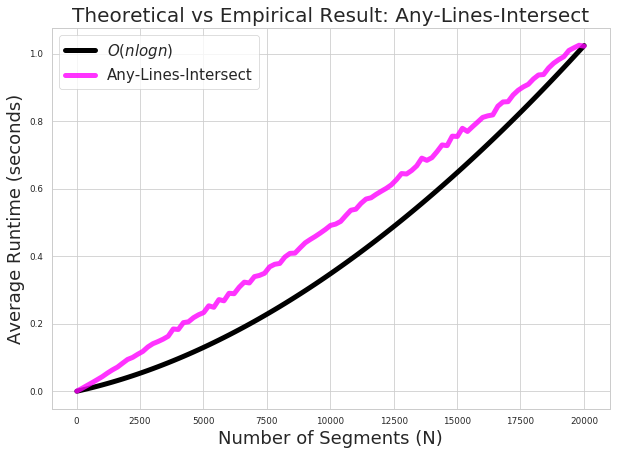

In [134]:
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 7))

input_sizes = np.arange(10,20101,200)

plt.plot(input_sizes,tnlnNO, linewidth=5, marker='',markerfacecolor='blue', markersize=6, color='black', label = r'$O(n log n)$')
plt.plot(input_sizes,no_intersect, linewidth=5, marker='',markerfacecolor='blue', markersize=6,alpha=0.8, color='fuchsia', label = 'Any-Lines-Intersect')

plt.ylabel('Average Runtime (seconds)',fontsize=18)
plt.xlabel('Number of Segments (N)',fontsize=18)
plt.title('Theoretical vs Empirical Result: Any-Lines-Intersect', fontsize=20)
plt.legend(fontsize=15)

timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
plt.savefig(str(timestr)+' NO_INTERSECT_101sizes_20000.pdf', format='pdf', bbox_inches='tight') 

In [141]:
input_sizes = np.arange(10,100101,3000)
print(len(input_sizes), input_sizes)

34 [   10  3010  6010  9010 12010 15010 18010 21010 24010 27010 30010 33010
 36010 39010 42010 45010 48010 51010 54010 57010 60010 63010 66010 69010
 72010 75010 78010 81010 84010 87010 90010 93010 96010 99010]


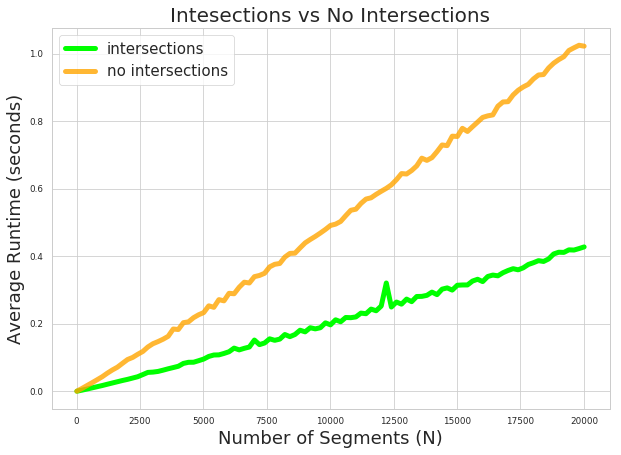

In [143]:
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 7))

input_sizes = np.arange(10,20101,200)

plt.plot(input_sizes,labs2, linewidth=5, marker='',markerfacecolor='blue', markersize=6, color='lime', label = 'intersections')
plt.plot(input_sizes,no_intersect, linewidth=5, marker='',markerfacecolor='blue', markersize=6,alpha=0.8, color='orange', label = 'no intersections')

plt.ylabel('Average Runtime (seconds)',fontsize=18)
plt.xlabel('Number of Segments (N)',fontsize=18)
plt.title('Intesections vs No Intersections', fontsize=20)
plt.legend(fontsize=15)

timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
plt.savefig(str(timestr)+' NO_INTERSECT_vs_Intersect_20000.pdf', format='pdf', bbox_inches='tight') 

In [144]:
big2 = [2.740716934204101476e-04,1.419252300262451305e-01,2.842584109306335316e-01,4.397657966613769398e-01,5.956780695915222523e-01,7.568763780593872337e-01,9.141396355628966797e-01,1.084820642471313379e+00,1.264458820819854834e+00,1.431009550094604510e+00,1.628363709449768049e+00,1.783962481021881041e+00,1.962916607856750595e+00,2.151685857772827060e+00,2.357577364444732648e+00,2.524674134254455637e+00,2.699671850204467649e+00,2.898785088062286519e+00,3.063568377494811923e+00,3.255894238948822128e+00,3.441242375373840368e+00,3.641454818248748726e+00,3.793885855674743457e+00,4.018135883808136022e+00,4.184499897956848180e+00,4.359622607231139924e+00,4.579130151271820104e+00,4.742579305171966908e+00,4.931580157279968013e+00,5.148363077640533803e+00,5.368516411781310893e+00,5.529914715290069616e+00,5.775638668537140141e+00,5.949514031410217285e+00]

In [169]:
#Theoretical  n log n
# thlg = np.linspace(1,41.1, len(input_sizes))
thlg2 = np.linspace(1,3.39, 34) # big run
# thlg = np.linspace(1,20000, 201) # big brain

# thlg = np.linspace(1,1.2641, 101) # labs

# print(thlg)
# print()
tnlnNO2 = thlg2*np.log2(thlg2)
print(tnlnNO2)
print()
print(big2)

[0.         0.10818159 0.22342483 0.34528238 0.47336022 0.60730868
 0.7468153  0.89159923 1.04140666 1.19600704 1.35519011 1.51876325
 1.6865494  1.85838523 2.03411961 2.21361227 2.3967327  2.58335915
 2.77337777 2.96668188 3.1631713  3.36275179 3.56533452 3.77083562
 3.97917578 4.1902799  4.40407673 4.62049862 4.83948123 5.0609633
 5.28488642 5.51119486 5.73983539 5.97075708]

[0.00027407169342041015, 0.14192523002624513, 0.28425841093063353, 0.43976579666137694, 0.5956780695915223, 0.7568763780593872, 0.9141396355628967, 1.0848206424713134, 1.2644588208198548, 1.4310095500946045, 1.628363709449768, 1.783962481021881, 1.9629166078567506, 2.151685857772827, 2.3575773644447326, 2.5246741342544556, 2.6996718502044676, 2.8987850880622865, 3.063568377494812, 3.255894238948822, 3.4412423753738404, 3.6414548182487487, 3.7938858556747435, 4.018135883808136, 4.184499897956848, 4.35962260723114, 4.57913015127182, 4.742579305171967, 4.931580157279968, 5.148363077640534, 5.368516411781311, 5.5299

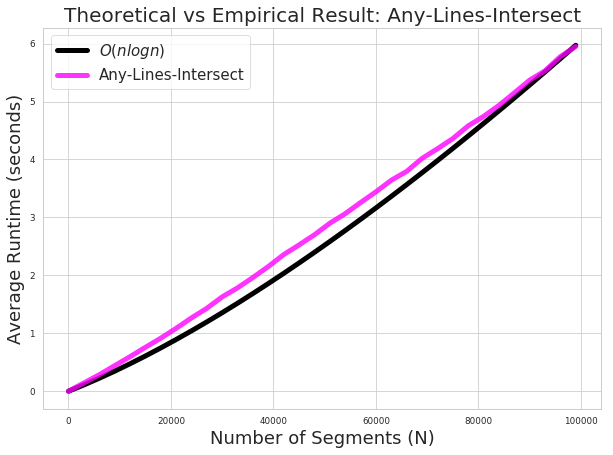

In [170]:
sns.set(style="whitegrid")
sns.set_context("paper")
plt.figure(figsize=(10, 7))

input_sizes = np.arange(10,100101,3000) #34, up to 100000   

plt.plot(input_sizes,tnlnNO2, linewidth=5, marker='',markerfacecolor='blue', markersize=6, color='black', label = r'$O(n log n)$')
plt.plot(input_sizes,big2, linewidth=5, marker='',markerfacecolor='blue', markersize=6,alpha=0.8, color='fuchsia', label = 'Any-Lines-Intersect')

plt.ylabel('Average Runtime (seconds)',fontsize=18)
plt.xlabel('Number of Segments (N)',fontsize=18)
plt.title('Theoretical vs Empirical Result: Any-Lines-Intersect', fontsize=20)
plt.legend(fontsize=15)

timestr = time.strftime("%Y-%m-%d__%H_%M_%S")
plt.savefig(str(timestr)+' NO_INTERSECT_34izes_100000.pdf', format='pdf', bbox_inches='tight') 